In [1]:
using Pkg;
Pkg.activate(".");
Pkg.instantiate();

 Activating environment at `~/Documents/GitHub/NNtutorial/Project.toml`


In [2]:
using LinearAlgebra, DataFrames, Plots, StatsPlots, LaTeXStrings; pyplot();
using Random, PyCall, Statistics, StatsBase, MLDataUtils;

include("nntutorial.jl");

# The Data

In [3]:
skldg = pyimport("sklearn.datasets"); # import data import function from python

In [4]:
digits = skldg.load_digits(); # load the data

In [5]:
# here is what is in the data
digits

Dict{Any,Any} with 7 entries:
  "images"        => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0…
  "feature_names" => ["pixel_0_0", "pixel_0_1", "pixel_0_2", "pixel_0_3", "pixe…
  "frame"         => nothing
  "target_names"  => [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
  "data"          => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0…
  "target"        => [0, 1, 2, 3, 4, 5, 6, 7, 8, 9  …  5, 4, 8, 8, 4, 9, 0, 8, …
  "DESCR"         => ".. _digits_dataset:\n\nOptical recognition of handwritten…

In [6]:
# let's examine a single image
digits["images"][1,:,:]

8×8 Array{Float64,2}:
 0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0
 0.0  0.0  13.0  15.0  10.0  15.0  5.0  0.0
 0.0  3.0  15.0   2.0   0.0  11.0  8.0  0.0
 0.0  4.0  12.0   0.0   0.0   8.0  8.0  0.0
 0.0  5.0   8.0   0.0   0.0   9.0  8.0  0.0
 0.0  4.0  11.0   0.0   1.0  12.0  7.0  0.0
 0.0  2.0  14.0   5.0  10.0  12.0  0.0  0.0
 0.0  0.0   6.0  13.0  10.0   0.0  0.0  0.0

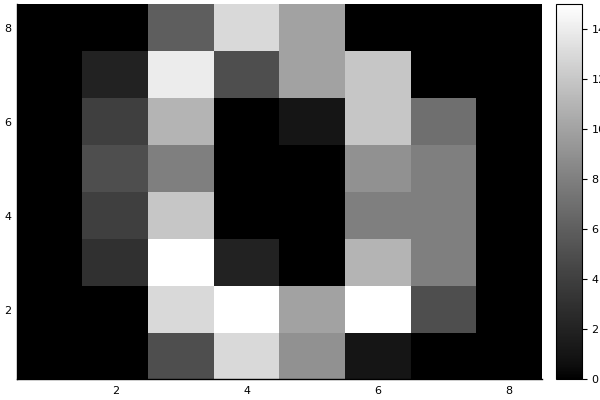

In [7]:
# visualization 
heatmap(digits["images"][1,:,:], color = :greys)

In [8]:
# show the value of first digit
digits["target"][1]

0

In [9]:
# show the pixel values for the first digit
digits["data"][1,:]

64-element Array{Float64,1}:
  0.0
  0.0
  5.0
 13.0
  9.0
  1.0
  0.0
  0.0
  0.0
  0.0
 13.0
 15.0
 10.0
  ⋮
 10.0
 12.0
  0.0
  0.0
  0.0
  0.0
  6.0
 13.0
 10.0
  0.0
  0.0
  0.0

In [10]:
# full set of pixel values, each row is a different image
digits["data"]

1797×64 Array{Float64,2}:
 0.0  0.0   5.0  13.0   9.0   1.0   0.0  …   6.0  13.0  10.0   0.0   0.0  0.0
 0.0  0.0   0.0  12.0  13.0   5.0   0.0      0.0  11.0  16.0  10.0   0.0  0.0
 0.0  0.0   0.0   4.0  15.0  12.0   0.0      0.0   3.0  11.0  16.0   9.0  0.0
 0.0  0.0   7.0  15.0  13.0   1.0   0.0      7.0  13.0  13.0   9.0   0.0  0.0
 0.0  0.0   0.0   1.0  11.0   0.0   0.0      0.0   2.0  16.0   4.0   0.0  0.0
 0.0  0.0  12.0  10.0   0.0   0.0   0.0  …   9.0  16.0  16.0  10.0   0.0  0.0
 0.0  0.0   0.0  12.0  13.0   0.0   0.0      1.0   9.0  15.0  11.0   3.0  0.0
 0.0  0.0   7.0   8.0  13.0  16.0  15.0     13.0   5.0   0.0   0.0   0.0  0.0
 0.0  0.0   9.0  14.0   8.0   1.0   0.0     11.0  16.0  15.0  11.0   1.0  0.0
 0.0  0.0  11.0  12.0   0.0   0.0   0.0      9.0  12.0  13.0   3.0   0.0  0.0
 0.0  0.0   1.0   9.0  15.0  11.0   0.0  …   1.0  10.0  13.0   3.0   0.0  0.0
 0.0  0.0   0.0   0.0  14.0  13.0   1.0      0.0   1.0  13.0  16.0   1.0  0.0
 0.0  0.0   5.0  12.0   1.0   0.0   0.

In [11]:
# normalize the data
X = standardize(ZScoreTransform, digits["data"], dims=1);
function remove_nans(x)
    if isnan(x)
        return 0.0
    else 
        return x
    end
end
X = remove_nans.(X);

In [12]:
size(digits["data"])

(1797, 64)

In [13]:
digits["data"][1, :]

64-element Array{Float64,1}:
  0.0
  0.0
  5.0
 13.0
  9.0
  1.0
  0.0
  0.0
  0.0
  0.0
 13.0
 15.0
 10.0
  ⋮
 10.0
 12.0
  0.0
  0.0
  0.0
  0.0
  6.0
 13.0
 10.0
  0.0
  0.0
  0.0

In [14]:
X[1, :]

64-element Array{Float64,1}:
  0.0
 -0.33492325878805623
 -0.043069029109717966
  0.27399525202861885
 -0.6642926016787297
 -0.8438944820720514
 -0.40960990281505144
 -0.12498813188874437
 -0.059061117002451896
 -0.6238356128858208
  0.4828400969954889
  0.7594110633517563
 -0.058409604319378854
  ⋮
  0.11009908693312889
  0.537461555837553
 -0.7572250303913418
 -0.20972674790990398
 -0.023589892481053584
 -0.29899811837308815
  0.0866945575958979
  0.2082346133387899
 -0.3666691579949807
 -1.1463283667812885
 -0.5055290846700855
 -0.19595297364240172

In [15]:
mean(X[1,:])

-0.0157130590095214

In [16]:
std(X[1,:])

0.7666185947757449

In [17]:
# split the data
(x_train,y_train), (x_test,y_test) = splitobs((X', digits["target"]), at = 0.6);

In [18]:
size(x_train)

(64, 1078)

In [19]:
size(x_test)

(64, 719)

In [20]:
size(y_train)

(1078,)

In [21]:
size(y_test)

(719,)

In [22]:
function convertytovect(y)
    N = length(y);
    yvect = zeros(N,10);
    for i =1:N
        yvect[i,y[i]+1] = 1;
    end
    return yvect
end

convertytovect (generic function with 1 method)

In [23]:
yvtrain = convertytovect(y_train);
yvtest = convertytovect(y_test);

In [24]:
y_train[12]

1

In [25]:
yvtrain[12,:]

10-element Array{Float64,1}:
 0.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [27]:
x_train'[12,:]

64-element Array{Float64,1}:
  0.0
 -0.33492325878805623
 -1.0946321447369363
 -2.7856620532488976
  0.5019186187361562
  1.2738456100263678
 -0.10892812366527718
 -0.12498813188874437
 -0.059061117002451896
 -0.6238356128858208
 -1.9150399000095313
 -1.7547040450548506
  1.1961169968191563
  ⋮
  1.241737175887366
  0.8690730290873667
 -0.7572250303913418
 -0.20972674790990398
 -0.023589892481053584
 -0.29899811837308815
 -1.089079932968847
 -2.5348143799646126
  0.2413632722575388
  1.5652498480846604
 -0.2610630552965269
 -0.19595297364240172

In [28]:
nn_structure = (64,30,10);

In [29]:
function setup_init_weights(nn_structure)
    W = Dict();
    b = Dict();
    for l = 2:length(nn_structure)
        push!(W,l=>randn(nn_structure[l],nn_structure[l-1]))
        push!(b,l=>randn(nn_structure[l]))
    end
    return W, b
end

setup_init_weights (generic function with 1 method)

In [30]:
function init_tri_values(nn_structure)
    tri_W = Dict();
    tri_b = Dict();
    for l = 2:length(nn_structure)
        push!(tri_W,l=>zeros(nn_structure[l],nn_structure[l-1]))
        push!(tri_b,l=>zeros(nn_structure[l]))
    end
    return tri_W, tri_b
end

init_tri_values (generic function with 1 method)

In [31]:
f(x) = nntutorial.factivate(x);

In [32]:
function feed_forward(x, W, b)
    h = Dict(2=>x);
    z = Dict();
    node_in = 0.0;
    for l = 2:length(keys(W))+1
        if 1 == 2
            node_in = x;
        else
            node_in = h[l];
        end
        z[l+1] = W[l]*node_in .+ b[l];
        h[l+1] = f.(z[l+1]);
    end
    return h, z
end

feed_forward (generic function with 1 method)

In [33]:
f′(x) = nntutorial.factivateprime(x);

In [34]:
function calculate_out_layer_delta(y,h_out,z_out)
    return -(y .- h_out).*f′.(z_out)
end

calculate_out_layer_delta (generic function with 1 method)

In [35]:
function calculate_hidden_delta(delta_plus_1,w_l,z_l)
    return w_l'*delta_plus_1 .* f′.(z_l)
end

calculate_hidden_delta (generic function with 1 method)

In [36]:
iter_num = 10;
println("Number of iterations = $iter_num")

Number of iterations = 10


In [36]:
function do_something(nn_structure,X,y,W,b,tri_W,tri_b,avg_cost)
    for i = 1:length(y)
            delta = Dict();
            # perform the feed forward pass and return the stored h and z values, to be used in the
            # gradient descent step
            h, z = feed_forward(X[i, :], W, b);
            # loop from nl-1 to 1 backpropagating the errors
            for l = length(nn_structure):-1:1
                if l == length(nn_structure)
                    delta[l] = calculate_out_layer_delta(y[i,:], h[l], z[l]);
                    avg_cost = avg_cost + norm((y[i,:]-h[l]));
                else
                    if l > 1
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    end
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(h^(l))
                    tri_W[l] = tri_W[l] + delta[l+1]*h[l]'; 
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] = tri_b[l] + delta[l+1];
                end
            end
    end
    return avg_cost, tri_W, tri_b
end

do_something (generic function with 1 method)

In [37]:
# perform the gradient descent step for the weights in each layer
function do_something_else(nn_structure,W,b,tri_W,tri_b,m,alpha)
    for l = length(nn_structure)-1:-1:1
            W[l] = W[l] +  -alpha * (1.0/m * tri_W[l])
            b[l] = b[l] +  -alpha * (1.0/m * tri_b[l])
    end
    return W, b
end

do_something_else (generic function with 1 method)

In [38]:
function train_nn(nn_structure, X, y; iter_num=3000, alpha=0.25)
    W, b = setup_init_weights(nn_structure);
    cnt = 0;
    m = length(y);
    avg_cost_func = [];
    println("Starting gradient descent for $iter_num iterations.")
    while cnt < iter_num
        if cnt%1000 == 0
            println("Iteration $cnt of $iter_num iterations.")
        end
        tri_W, tri_b = init_tri_values(nn_structure);
        avg_cost = 0;
        avg_cost, tri_W, tri_b = do_something(nn_structure,X,y,W,b,tri_W,tri_b,avg_cost);
        W, b = do_something_else(nn_structure,W,b,tri_W,tri_b,m,alpha);
        # complete the average cost calculation
        avg_cost = 1.0/m * avg_cost
        append!(avg_cost_func,avg_cost)
        cnt = cnt + 1;
    end
    return W, b, avg_cost_func
end

train_nn (generic function with 1 method)

In [ ]:
W, b, avg_cost_func = train_nn(nn_structure, x_train', yvtrain);